The datasets in which we will be using here were obtained via open sources.

---

Let's begin with importing our needed libraries.

In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np
import random

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Supervised learning focuses on finding a relationship between a matrix of features and a response variable. However, there is typically an additional latent structure in the feature matrix (some features might be related to each other or even redundant) and there also could be groups of observations that seem to be related. We can take advantage of these latent structures to allow us to study data without an explicit response in mind and to find better representations for our data (to improve predictive performance). Contrarily, unsupervised learning is designed to identify these kinds of structural relationships in our data. Thus, unsupervised learning has a different goal: feature discovery. A common type of unsupervised learning is clustering (to group “similar” data points together).

Let's begin with centroid clustering using k-means (looks for the centers of k pre-specified groups) on a dataset containing different types of beer.

In [2]:
# Let's read in the data #
beer = pd.read_csv('./data/beer.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [3]:
# Let's define X to determine clustering #
X = beer.drop('name', axis=1)

In [4]:
# Let's set K-means with three clusters #
km = KMeans(n_clusters=3, random_state=42)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [5]:
# Let's check the cluster labels #
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2])

In [6]:
# Let's save the cluster labels and sort #
beer['cluster'] = km.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
10,Coors,140,18,4.6,0.44,0


The clusters seem to be based on calories. We can notice that the numbers in the calories column are very large in comparison with the other columns. Thus, these will affect the Euclidean distance calculation the most (due to the fact that k-means squares the distance along each axis).

In [7]:
# Let's check the cluster centers #
km.cluster_centers_

array([[150.        ,  17.        ,   4.52142857,   0.52071429],
       [ 70.        ,  10.5       ,   2.6       ,   0.42      ],
       [102.75      ,  10.        ,   4.075     ,   0.44      ]])

In [8]:
# Let's calculate the mean of each feature for each cluster #
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,70.00,10.5,2.600000,0.420000
2,102.75,10.0,4.075000,0.440000


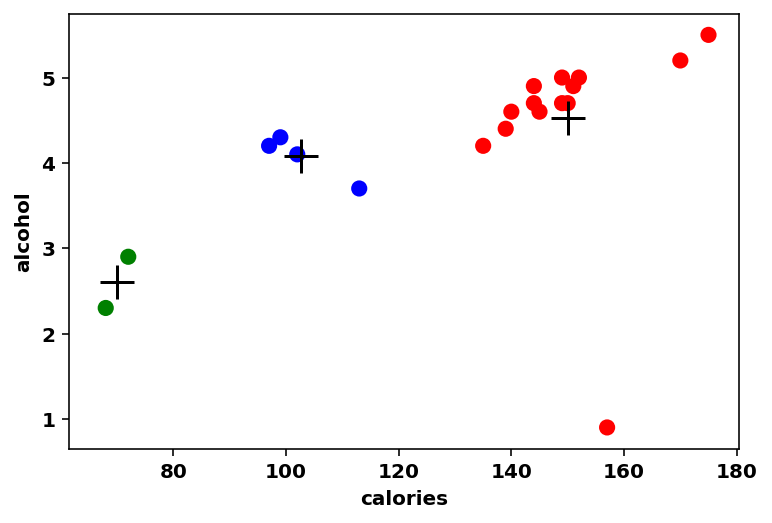

In [9]:
# Let's save the dataframe of the cluster centers #
centers = beer.groupby('cluster').mean()

# Let's set some colors for the clustered data points #
colors = np.array(['red', 'green', 'blue', 'yellow'])

# Let's visualize by plotting the data points #
plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster], s=50);

# Let's plot the cluster centers marked by "+" #
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black');

# Let's add labels #
plt.xlabel('calories');
plt.ylabel('alcohol');

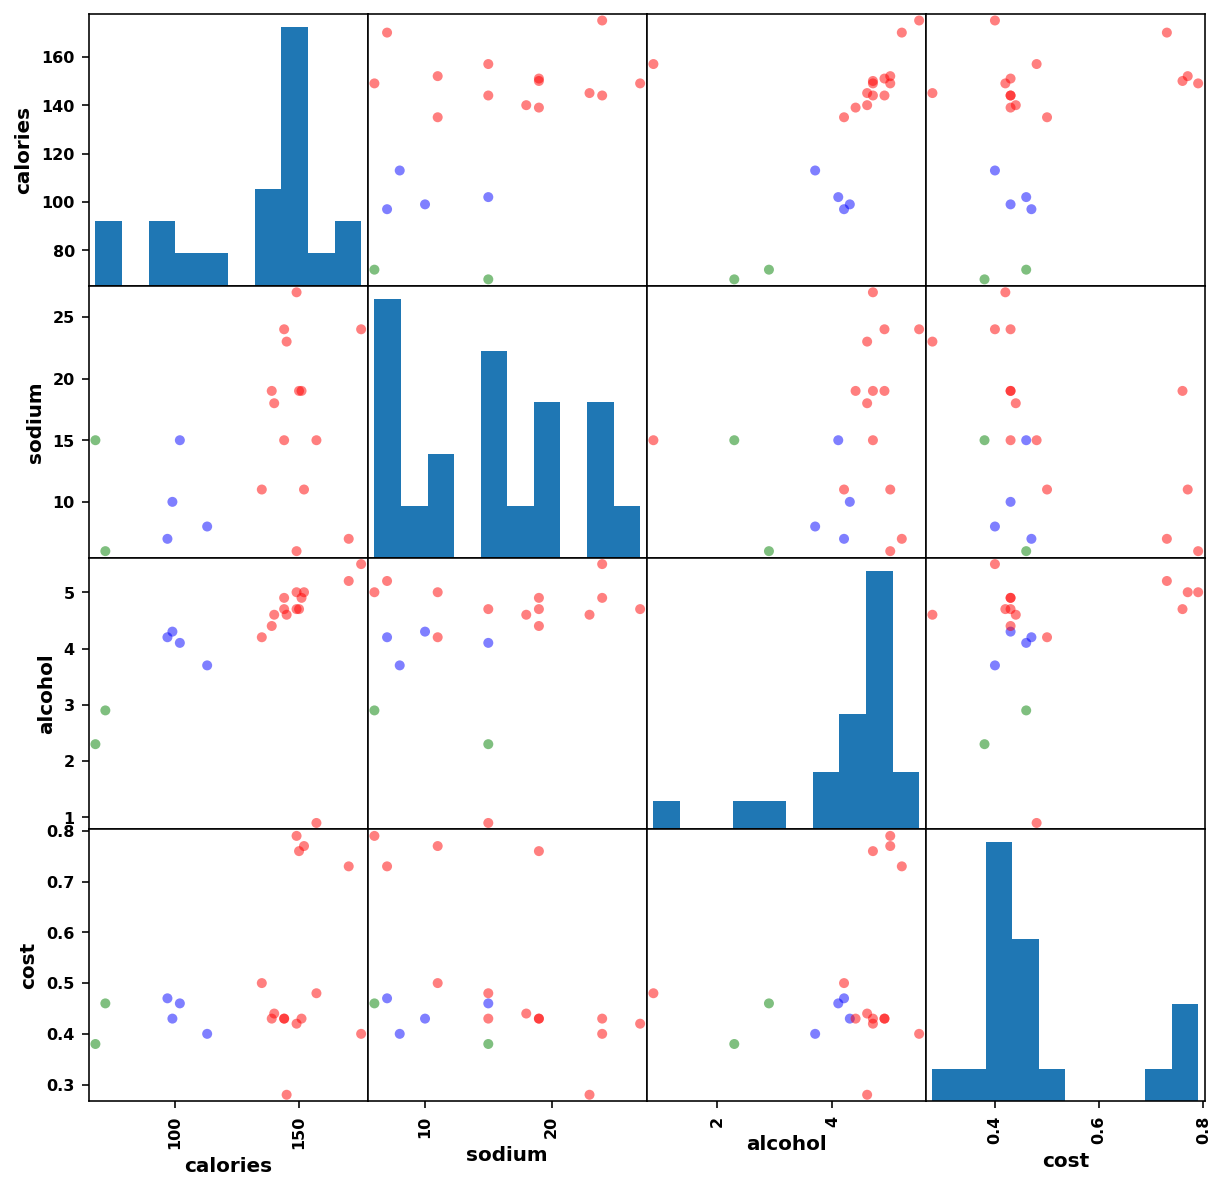

In [10]:
# Let's visualize using a scatter plot matrix (0=red, 1=green, 2=blue) #
pd.plotting.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100);

Let's repeat with scaled data. Unscaled features cause most algorithms to put too much weight onto one feature. We can scale our data to make sure k-means accounts for all features. The k-means algorithm looks for isotropic groups (data points that disperse from the center in all directions evenly). There are multiple scaling methods available but the best choice is the one that makes our clusters isotropic.

In [11]:
# Let's center and scale the data #
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Let's set K-means with three clusters #
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [13]:
# Let's check out the scaled data #
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [14]:
# Let's save the cluster labels and sort #
beer['cluster'] = km.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1
12,Michelob_Light,135,11,4.2,0.50,1


In [15]:
# Let's review the cluster centers #
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,148.375,21.125,4.7875,0.4075
1,105.375,10.875,3.3250,0.4475
2,155.250,10.750,4.9750,0.7625


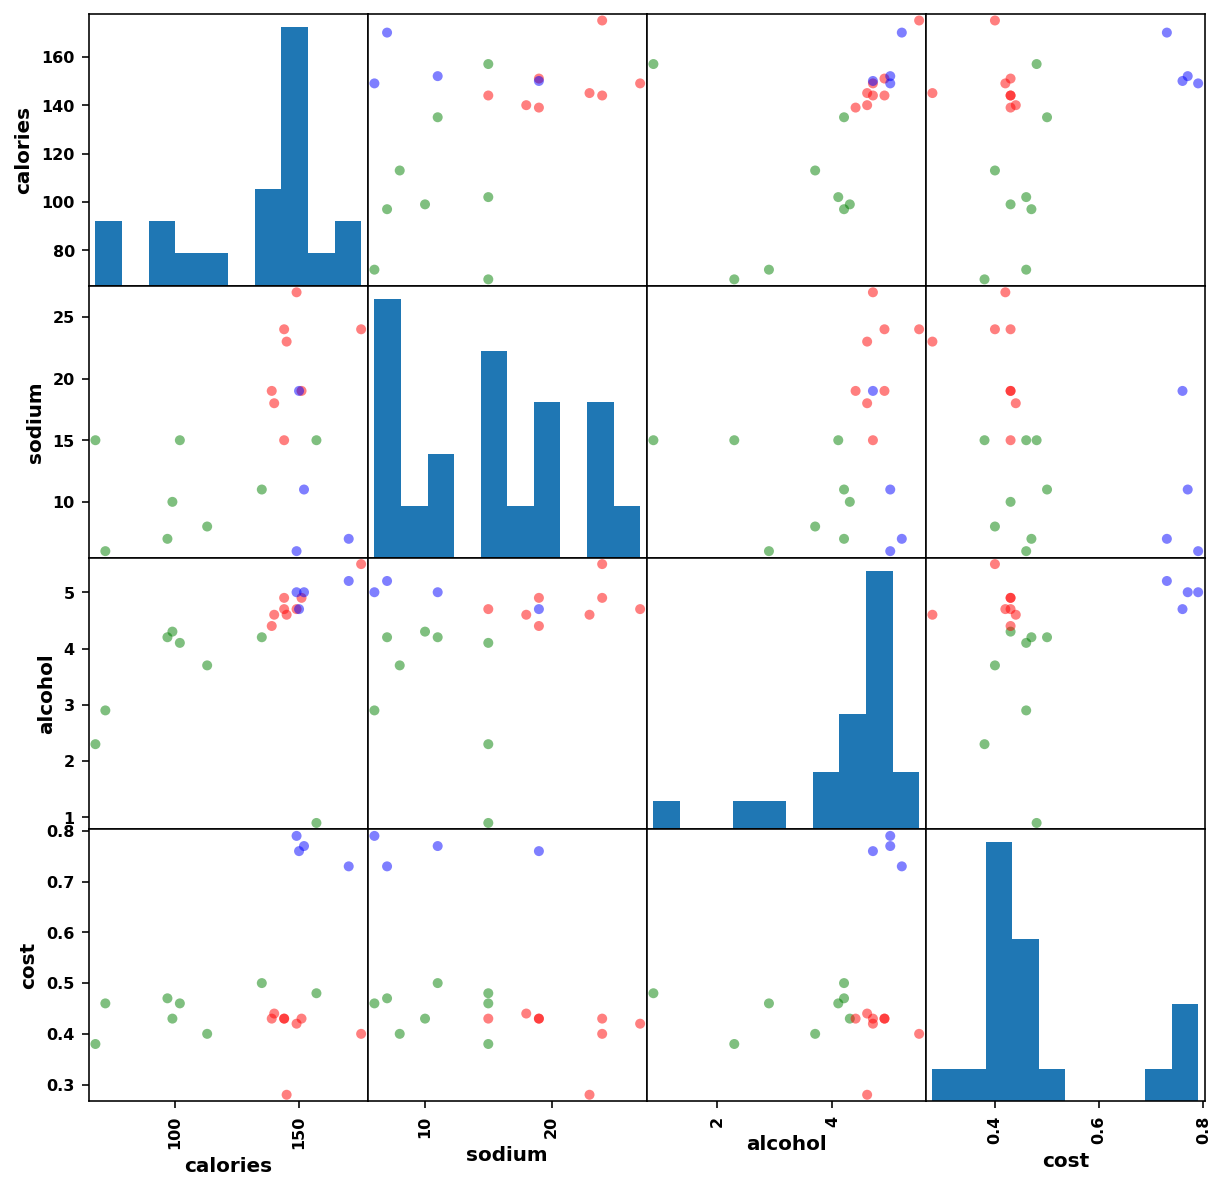

In [16]:
# Let's visualize using a scatter plot matrix again (0=red, 1=green, 2=blue) #
pd.plotting.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100);

It appears that sodium is not often useful in predicting the clusters. Perhaps sodium levels vary quite a lot amongst all types of beers and are not indicative of beer type. Let's continue with Density-Based Spatial Clustering of Applications With Noise (DBSCAN). DBSCAN is used to group together closely packed points by identifying core points, reachable points, and outliers. Unlike K-means, DBSCAN can find arbitrarily shaped clusters, does not partition the entire space into classes (it also does not label every point as part of a cluster), and does not create a fixed number of clusters (instead, it finds clusters based on density using a neighborhood radius and a minimum number of samples within it).

In [17]:
# Let's set DBSCAN with eps=1 (neighborhood radius) and min_samples=3 (points required in given radius) #
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [18]:
# Let's check the cluster labels #
db.labels_

array([ 0,  0, -1,  1,  1, -1, -1,  0,  2,  2,  0,  2,  0, -1,  1, -1,  0,
        0, -1,  2], dtype=int64)

In [19]:
# Let's save the cluster labels and sort #
beer['cluster'] = db.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
2,Lowenbrau,157,15,0.9,0.48,-1
5,Old_Milwaukee,145,23,4.6,0.28,-1
6,Augsberger,175,24,5.5,0.40,-1
18,Olympia_Goled_Light,72,6,2.9,0.46,-1
13,Becks,150,19,4.7,0.76,-1
15,Pabst_Extra_Light,68,15,2.3,0.38,-1
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


In [20]:
# Let's check the cluster centers #
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
-1,127.833333,17.0,3.483333,0.460000
0,143.142857,19.0,4.628571,0.440000
1,157.000000,8.0,5.066667,0.763333
2,102.750000,10.0,4.075000,0.440000


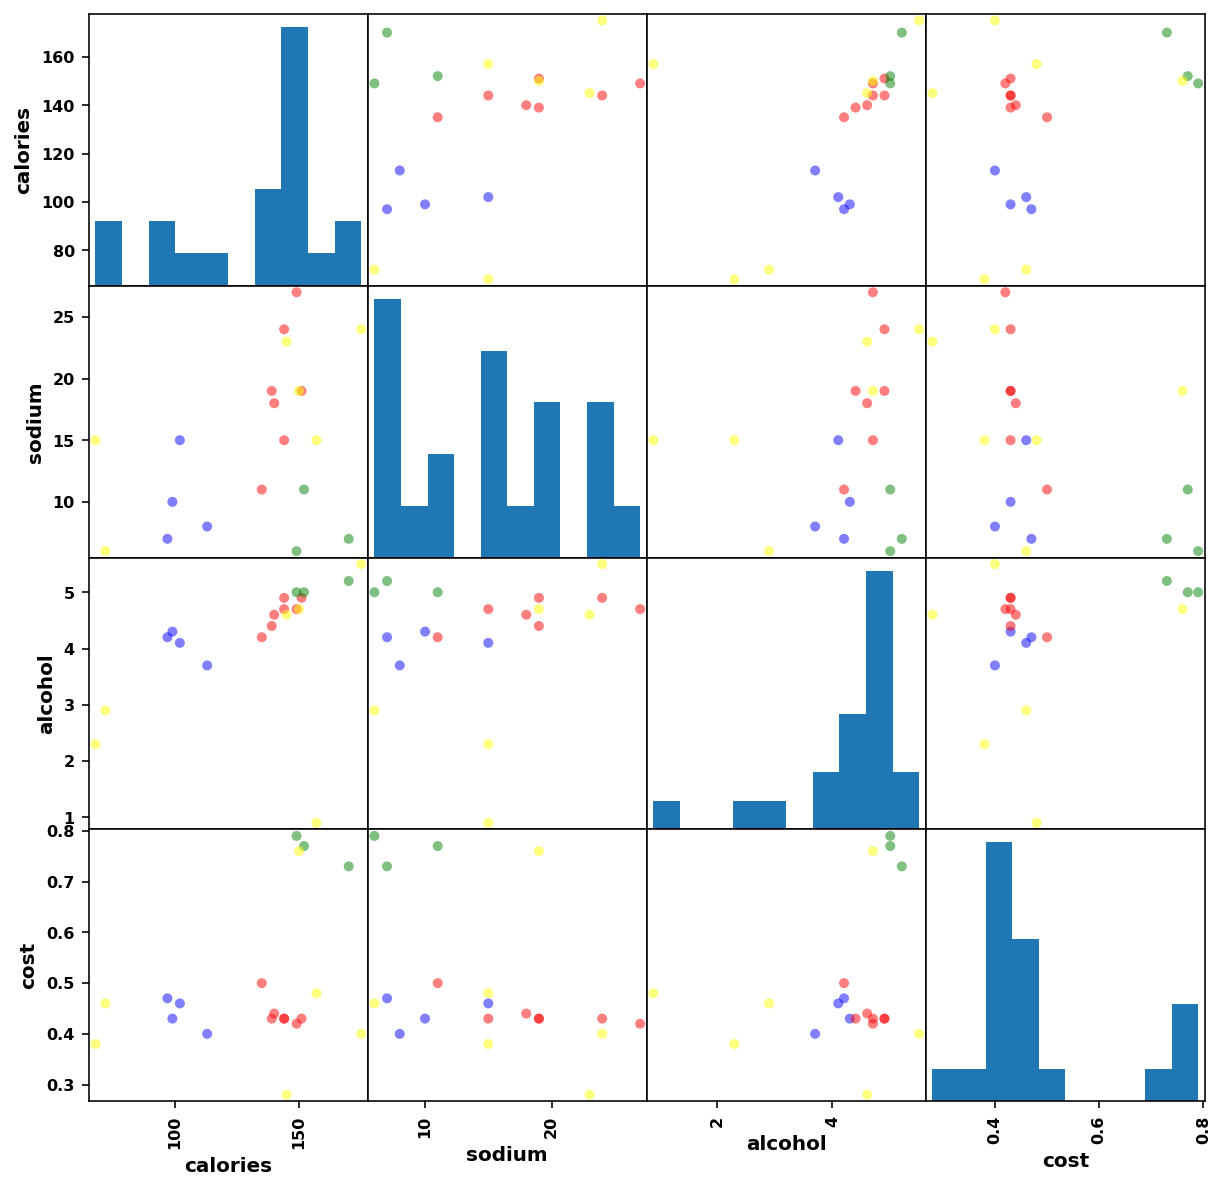

In [21]:
# Let's visualize using a scatter plot matrix (0=red, 1=green, 2=blue, -1=yellow) #
pd.plotting.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100);

Hierarchical clustering, like K-means clustering, is another common form of clustering analysis. With this type of clustering we seek to do exactly what the name suggests: to build hierarchies of clusters and connect the clusters in the hierarchy with links. Once these links are determined, we can display them in a dendrogram (a graph that displays all of these links in their hierarchical structure).

In [22]:
# Let's set Hierarchical clustering with n_clusters=4 and labels #
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(X_scaled)
labels = agg.labels_

In [23]:
# Let's check the cluster labels #
agg.labels_

array([1, 1, 3, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0],
      dtype=int64)

In [24]:
# Let's save the cluster labels and sort #
beer['cluster'] = agg.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
9,Budweiser_Light,113,8,3.7,0.40,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
12,Michelob_Light,135,11,4.2,0.50,0
11,Coors_Light,102,15,4.1,0.46,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
8,Miller_Lite,99,10,4.3,0.43,0
19,Schlitz_Light,97,7,4.2,0.47,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
5,Old_Milwaukee,145,23,4.6,0.28,1
10,Coors,140,18,4.6,0.44,1


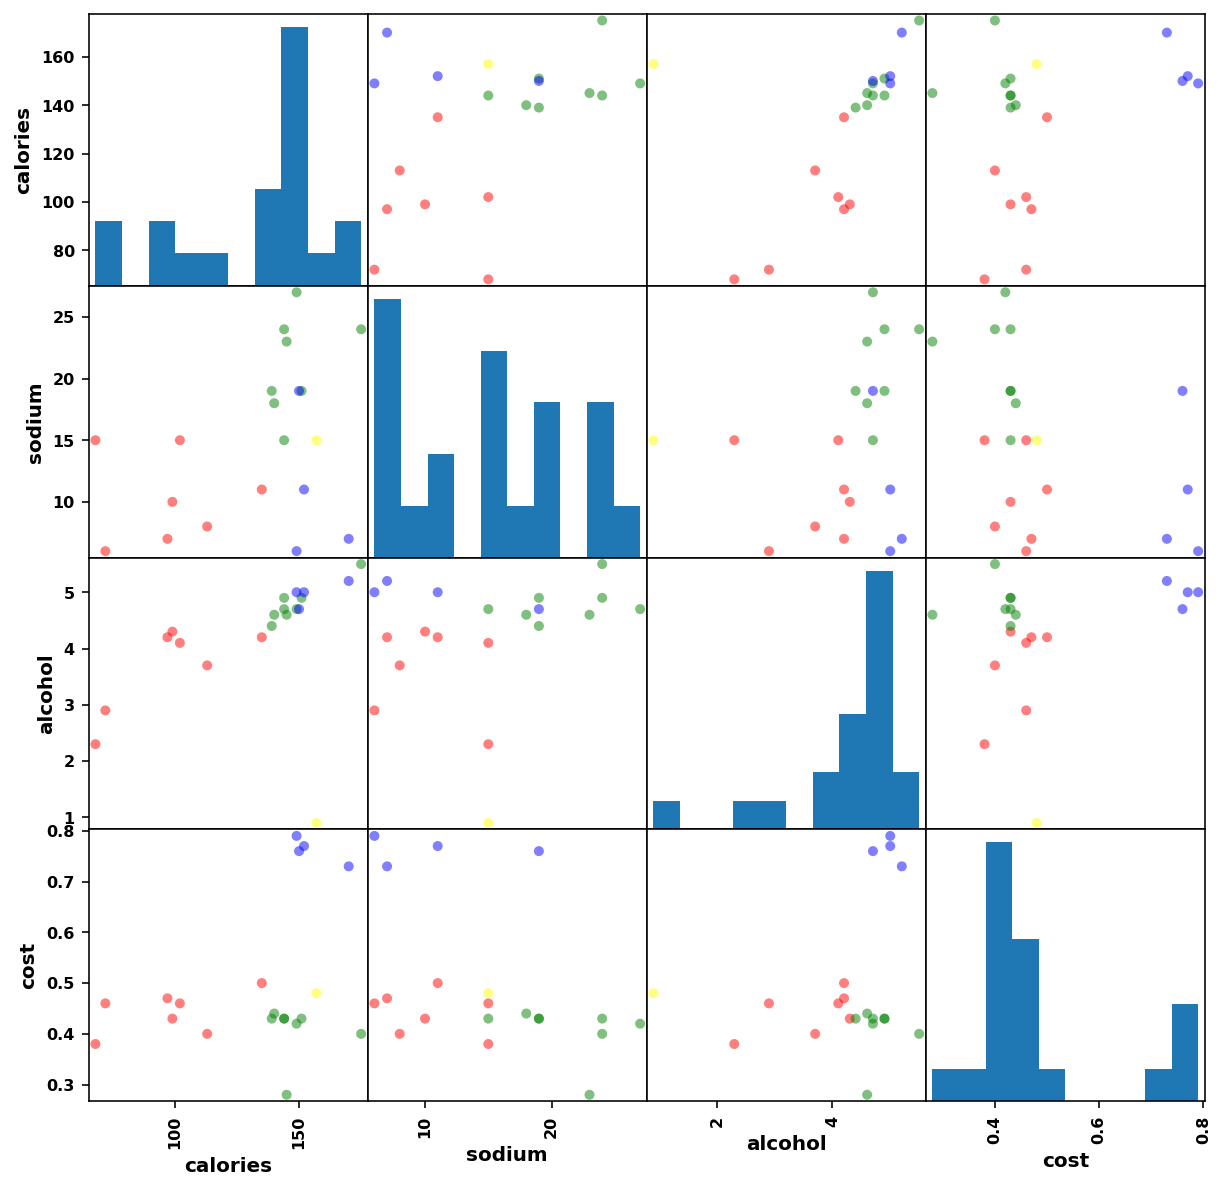

In [25]:
# Let's visualize using a scatter plot matrix (0=red, 1=green, 2=blue, 3=yellow) #
pd.plotting.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100);

As usual, we need a metric to evaluate model fit. For clustering, we often use a metric called the Silhouette Coefficient. Furthermore, it should be noted that a "good fit" for clustering is often arbitrary. The Silhouette Coefficient gives a score for each sample individually. At a high level, it compares the point's cohesion to its cluster against its separation from the nearest other cluster. Ideally, we want the point to be very nearby other points in its own cluster and very far to points in the nearest other cluster. The coefficient ranges between 1 and -1 (the larger the coefficient, the better the clustering). To get a score for all clusters, rather than for a particular point, we average over all points to judge the cluster algorithm.

In [26]:
# Let's calculate the Silhouette Coefficient #
metrics.silhouette_score(X, labels, metric='euclidean')

0.1416330750786457

We can use clustering to discover new features, then use those features for either classification or regression. For classification, we can use clusters directly to classify new points. For regression, we can use a dummy variable for the clusters as a variable in our regression.

C:\Users\Daniel\Anaconda3\lib\site-packages\scipy\stats\_multivariate.py:660: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


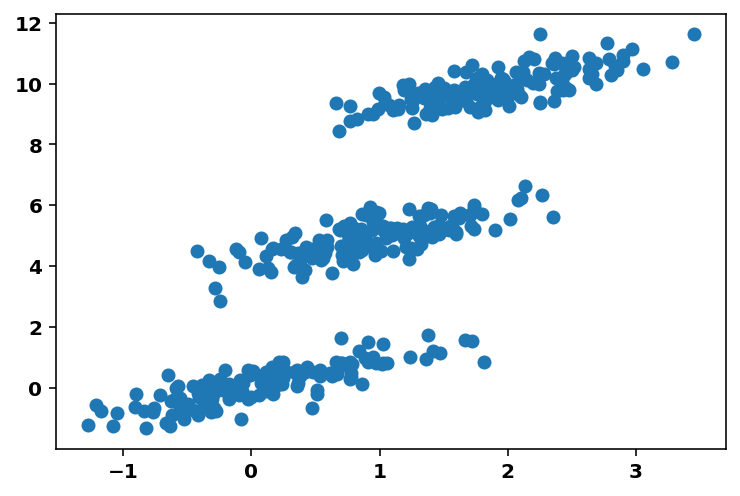

In [27]:
# Let's create some synthetic data #
data = []
dist = multivariate_normal(mean=[0, 0], cov=[[0.5, 0.5],[0,0.1]])

for i in range(150):
    p = list(dist.rvs())
    data.append(dist.rvs())
    
dist = multivariate_normal(mean=[1, 5], cov=[[0.5, 0.5],[0,0.1]])

for i in range(150):
    data.append(dist.rvs())

dist = multivariate_normal(mean=[2, 10], cov=[[0.5, 0.5],[0,0.1]])

for i in range(150):
    data.append(dist.rvs())

df = pd.DataFrame(data, columns=['x', 'y'])
plt.scatter(df['x'], df['y'])
plt.show()

In [28]:
# Let's create a function to color code the data #
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

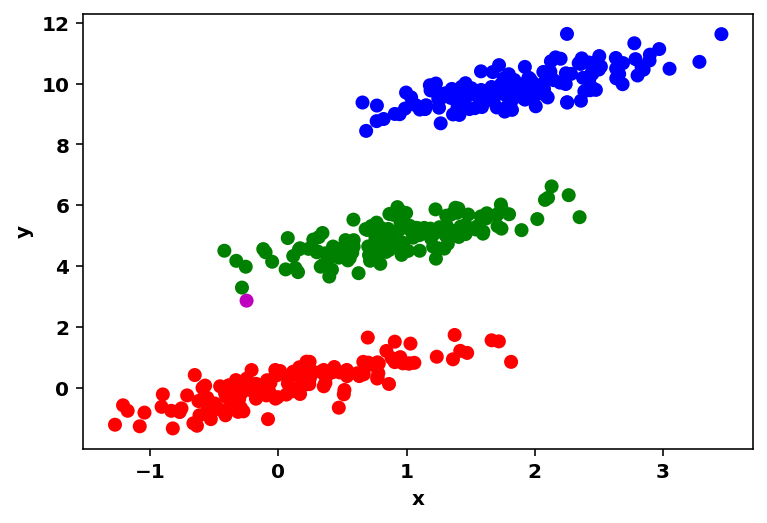

In [29]:
# Let's fit a DBSCAN estimator onto the data #
estimator = DBSCAN(eps=0.8, min_samples=10)

X = df[['x', 'y']]

estimator.fit(X)

labels = estimator.labels_

colors = set_colors(labels)

plt.scatter(df['x'], df['y'], c=colors);
plt.xlabel('x');
plt.ylabel('y');
plt.show();

In [30]:
# Let's add cluster labels back into the dataframe #
df['cluster'] = labels
df = pd.concat([df, pd.get_dummies(df['cluster'], prefix="cluster")], axis=1)
df

,x,y,cluster,cluster_-1,cluster_0,cluster_1,cluster_2
0,0.354214,0.587541,0,0,1,0,0
1,-0.271493,-0.771847,0,0,1,0,0
2,-0.240757,0.218840,0,0,1,0,0
3,0.140878,-0.063405,0,0,1,0,0
4,0.075112,0.146105,0,0,1,0,0
5,-0.173552,-0.356702,0,0,1,0,0
6,0.063234,-0.221238,0,0,1,0,0
7,-0.253339,0.032583,0,0,1,0,0
8,0.843066,1.211946,0,0,1,0,0
9,-0.087011,0.249905,0,0,1,0,0


In [31]:
# Let's fit a linear model with clusters included #
model = LinearRegression()
X = df[['x', 'cluster_0', 'cluster_1', 'cluster_2']]
y = df['y']
model.fit(X, y)

print('Accuracy:',(model.score(X, y)))

Accuracy: 0.9910981358533335


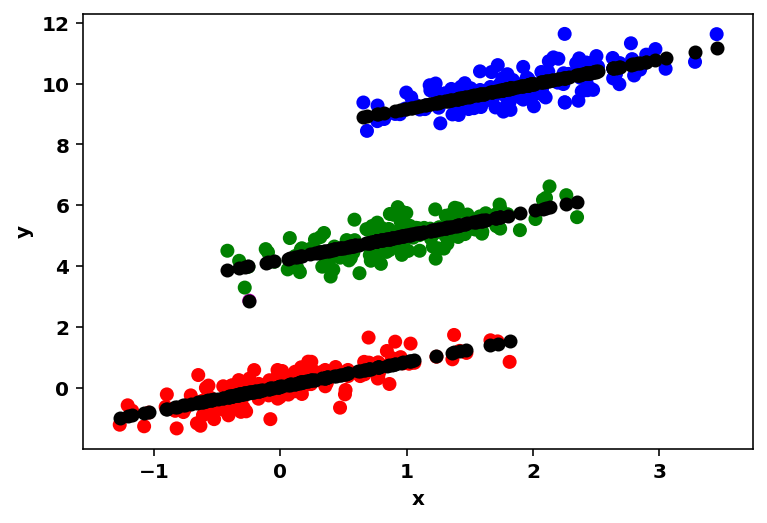

In [32]:
# Let's visualize #
colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors);
plt.xlabel('x');
plt.ylabel('y');

plt.scatter(df['x'], model.predict(X), color='black');

plt.show();

Accuracy: 0.7242141809887858


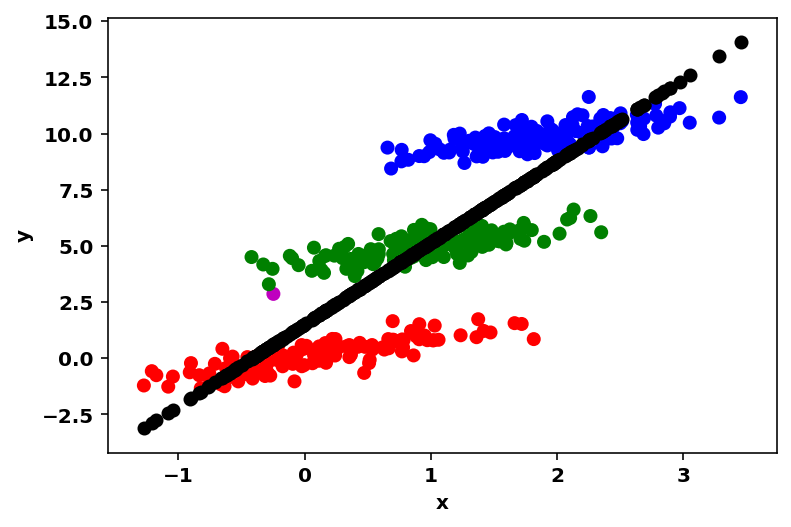

In [33]:
# Let's check what happens if we decided to not include the clusters that we estimated #
model = LinearRegression()
X = df[['x']]
y = df['y']
model.fit(X, y)
print('Accuracy:',(model.score(X, y)))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors);
plt.xlabel('x');
plt.ylabel('y');

plt.scatter(df['x'], model.predict(X), color='black');

plt.show();